In [1]:
#https://elitedatascience.com/keras-tutorial-deep-learning-in-python

https://ec2-54-218-123-212.us-west-2.compute.amazonaws.com:8888/notebooks/fastai_bmt_reworking/nonFastAITuts/urbansoundClassifier/Urban%20Sound%20Classification%20using%20CNN.ipynb

In [2]:
import numpy as np
np.random.seed(123)  # for reproducibility

In [3]:
from keras.models import Sequential
from keras import backend as K
K.set_image_dim_ordering('th')

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5110)


In [4]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot as plt

%matplotlib inline


In [5]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


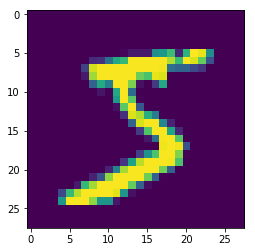

In [7]:
plt.imshow(X_train[0])

In [8]:
#NB: this reshape for theano
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [9]:
print X_train.shape
print X_test.shape
print X_train[0].shape

(60000, 1, 28, 28)
(10000, 1, 28, 28)
(1, 28, 28)


In [10]:
#pick a row in middle to show range of numbers
print X_train[0,0,14:15,:]
print "unique values:", np.unique(X_train)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0  81 240 253 253 119
   25   0   0   0   0   0   0   0   0   0]]
unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213

In [11]:
#convert from int to float and convert range from 0:255 to 0.0:1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print X_train[0,0,14:15,:]


[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.31764707  0.94117647  0.99215686  0.99215686  0.46666667  0.09803922
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]


In [12]:
print y_train.shape
print y_train[:10]

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [13]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
#same as the oneshot method used elsewhere
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [14]:
print Y_train.shape
print Y_test.shape

(60000, 10)
(10000, 10)


In [15]:
print Y_train[0]

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [16]:
model = Sequential()

In [17]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Total params: 0
Trainable params: 0
Non-trainable params: 0
____________________________________________________________________________________________________


In [29]:
print (X_train[0].shape)

(1, 28, 28)


In [18]:
#NBB: input_shape=(1,28,28) equals X_train[0].shape
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=X_train[0].shape))
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))

In [19]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 26, 26)    320         convolution2d_input_1[0][0]      
Total params: 320
Trainable params: 320
Non-trainable params: 0
____________________________________________________________________________________________________


In [21]:
print model.output_shape
#NB: should be (None, 32, 26, 26) is theano backend is used.

(None, 32, 26, 26)


In [22]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [24]:
print model.output_shape
print model.summary()

(None, 32, 12, 12)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 26, 26)    320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 32, 24, 24)    9248        convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 32, 12, 12)    0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 32, 12, 12)    0           maxpooling2d_1[0][0]             
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
____

In [25]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


(None, 10)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 26, 26)    320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 32, 24, 24)    9248        convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 32, 12, 12)    0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 32, 12, 12)    0           maxpooling2d_1[0][0]             
________________________________________________________________________________

In [26]:
print "model.output_shape:", model.output_shape
print model.summary()

model.output_shape: (None, 10)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 26, 26)    320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 32, 24, 24)    9248        convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 32, 12, 12)    0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 32, 12, 12)    0           maxpooling2d_1[0][0]             
____________________________________________________________

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 21s - loss: 0.1930 - acc: 0.9419    
Epoch 2/10
60000/60000 [==============================] - 22s - loss: 0.0839 - acc: 0.9745    
Epoch 3/10
60000/60000 [==============================] - 21s - loss: 0.0642 - acc: 0.9804    
Epoch 4/10
60000/60000 [==============================] - 21s - loss: 0.0519 - acc: 0.9836    
Epoch 5/10
60000/60000 [==============================] - 21s - loss: 0.0449 - acc: 0.9865    
Epoch 6/10
60000/60000 [==============================] - 22s - loss: 0.0408 - acc: 0.9873    
Epoch 7/10
60000/60000 [==============================] - 21s - loss: 0.0362 - acc: 0.9885    
Epoch 8/10
60000/60000 [==============================] - 22s - loss: 0.0328 - acc: 0.9890    
Epoch 9/10
60000/60000 [==============================] - 22s - loss: 0.0288 - acc: 0.9902    
Epoch 10/10
60000/60000 [==============================] - 21s - loss: 0.0276 - acc: 0.9907    
